In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interactive
from scipy.stats import norm
import numpy as np
import matplotlib.patches as patches
from OldBrain import Neuron, Net, GMM
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

This entire theory is built on the idea that everything is normalized as input into the brain. i.e. all values are between 0 and 1. This is necessary because the learning rule has an adaptive learning rate that is $\sigma^4$. If everything is normalized, the probability of $\sigma^2$ being greater than 1 is very low

In [6]:
#p = GMM([0.1,0.3,0.6], np.array([[0.2,.01],[0.5,0.01],[0.8,0.01]]))
p = GMM([0.4,0.6], np.array([[0.2,0.05],[0.65,.015]]))

In [7]:
num_samples = 1000
beg = 0.0
end = 1.0
t = np.linspace(beg,end,num_samples)
num_neurons = len(p.pis)
colors = [np.random.rand(num_neurons,) for i in range(num_neurons)]
p_y = p(t)
p_max = p_y.max()

In [9]:
np.random.seed(12)

num_neurons = 3
network = Net(1,1,num_neurons, bias=0.0002, decay=[0.03,0.05,0.03], kernels=[[1,1]], locs=[[0,0]], sleep_cycle=2000)
#print('nework.sleep_cycle = ', network.sleep_cycle)

samples, labels = p.sample(10000)
#samples = (samples-samples.min())/samples.max()
ys = []
lbls = []
colors = [np.random.rand(3,) for i in range(num_neurons)]
def f(i=0):
    #print('network.num_calls = ', network.num_calls)
    x = np.array(samples[i])
    l = labels[i]
    y = network(x.reshape(1,1,1))
    #y is np.array([q1(x), q2(x), ...])

    ys.append(y)
    c = 'b' if l else 'g'
    lbls.append(c)

    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot(t, p_y/p_max, c='r', lw=3, label='$p(x)$')
    ax.plot([x,x],[0,p_max],label="$x\sim p(x)$", lw=4)
    #print('int of p = ', p(t).sum()/1000)

    #for neurons in network.neurons.values():
        #for i,n in enumerate(neurons):
            #print('n = ', n)
            #print("q%i.bias = " %(i), n.bias)
    #print('t.shape = ', t.shape)
    #print('t = ', t)
    y = network(t.reshape(num_samples,1,1),update=0)
   
    for j,yi in enumerate(y):
        yj_max = y[j].max()
        ax.plot(t, y[j]/yj_max, c=colors[j], lw=3, label="$q(x)$")
        #ax.plot(t, y[j], c=colors[j], lw=3, label="$q_%i(x)$"%(j))

    #print('q_out.bias = ', q_out.neurons[(0,0.5)][0].bias)
    #ax[0].plot(t, q3.pi*q3(t,0), c='k', lw=3, label='$q3(x)$')
    #ax.legend()
    ax.set_ylim(0.,1.5)
    ax.set_xlim(beg,end)

    #fig2, ax2 = plt.subplots()
    #print('q_out.weights = ', q_out.weights)
    #print('q_out.bias = ', q_out.bias)
    #circle = plt.Circle(q_out.neurons[(0,0.5)][0].weights, np.sqrt(q_out.neurons[(0,0.5)][0].bias), fill=0)
    #ax2.set_ylim(-0.2,1.5)
    #ax2.set_xlim(-0.2,1.5)
    #ax2.add_artist(circle)
    #ysa = np.asarray(ys)
    #ax2.scatter(ysa[:,0],ysa[:,1],s=12,c=lbls)
    plt.savefig('figs/fig%03i.png'%(i))
    plt.show()
    

interactive_plot = interactive(f, i=(0, 9999))
output = interactive_plot.children[-1]
output.layout.height = '450px'
interactive_plot

interactive(children=(IntSlider(value=0, description='i', max=9999), Output(layout=Layout(height='450px'))), _…

In [5]:
[n.weights for n in list(network.neurons.items())[0][1]]

[array([[0.53373939]]), array([[0.01457496]]), array([[0.91874701]])]

In [6]:
[np.sqrt(n.bias) for n in list(network.neurons.items())[0][1]]

[array([0.0143527]), array([0.01449138]), array([0.0143527])]

In [7]:
[n.pi for n in list(network.neurons.items())[0][1]]

[0.13318287053837988, 0.6393365703535748, 0.22748055910804524]

I can assume $q(x)$ has two forms

$$q(x) = \frac{1}{\sqrt{2 \pi \sigma^2}}exp\{-\frac{(x-\mu)^2}{2\sigma^2}\}$$

or 

$$q(x) = exp\{-\frac{(x-\mu)^2}{\sigma^2}\}$$

When I assume the second form and remove the extra $\sigma$ term from the learning equations it no longer converges smoothly. However, if I add an 'astrocyte' to normalize all of them periodically by averaging over the output it works again. Perhaps astrocytes 'normalizing' the neurons is the biological mechanism for keeping the output roughly normal.

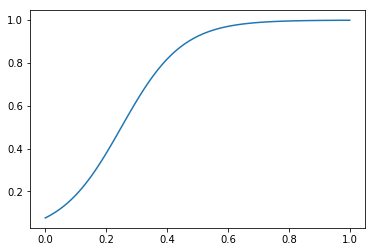

In [8]:
def s(x):
    return (1/(1+np.exp(-10*(x-0.25))))

x = np.linspace(0,1,100)
plt.plot(x,s(x))
plt.show()